<h2>Exploratory Data Scientists</h2>

<h3>Roles to Explore</h3>

In [5]:

# Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from datasets import load_dataset
import ast
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list)	if isinstance(skill_list, str) else skill_list)

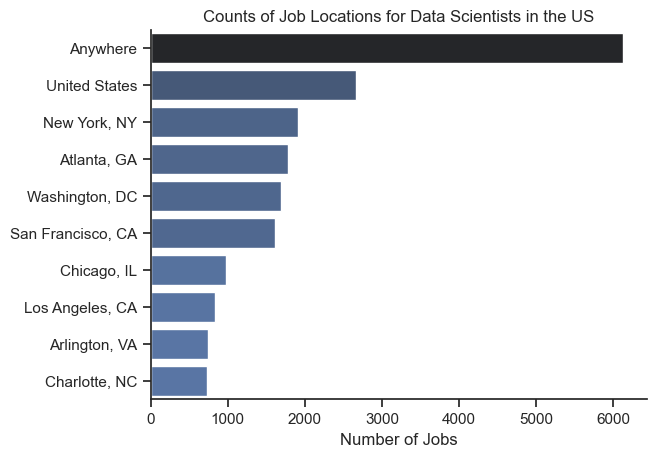

In [2]:
df_DS_US = df[ (df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')]
df_plot = df_DS_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine() # removes table borders
plt.title('Counts of Job Locations for Data Scientists in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

<h3>Job Oportunities</h3>

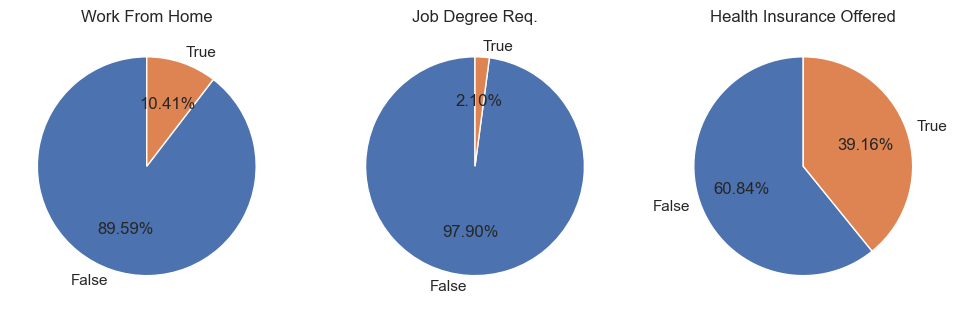

In [3]:
dict_column = {
	'job_work_from_home': 'Work From Home',
	'job_no_degree_mention': 'Job Degree Req.',
	'job_health_insurance': 'Health Insurance Offered',
}	

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(12,5)

for i, (column, title) in enumerate(dict_column.items()):
	ax[i].pie(df_DS_US[column].value_counts(), startangle=90, autopct='%1.2f%%', labels=['False', 'True'])
	ax[i].set_title(title)
plt.show()

<h3>Companies to Explore:</h3>

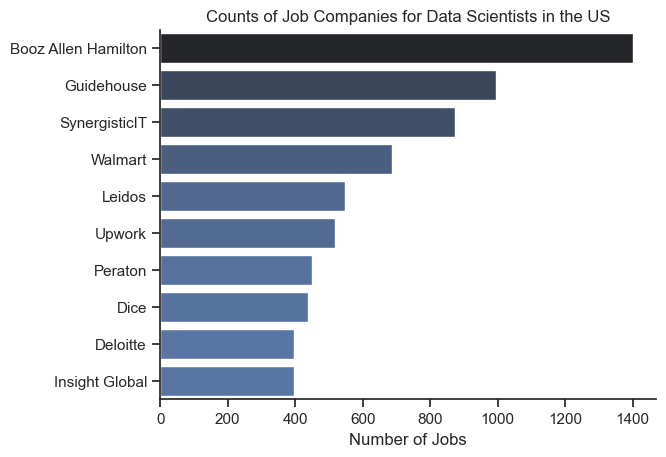

In [4]:
df_plot = df_DS_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine() # removes table borders
plt.title('Counts of Job Companies for Data Scientists in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()